Задание:
Используя данные из train.csv, построить
модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели предсказать
цены для квартир из файла test.csv.

Целевая переменная:
Price

Основная метрика:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Вспомогательная метрика:
MSE - средняя квадратичная ошибка (sklearn.metrics.mean_squared_error)

In [274]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [275]:
data_train = pd.read_csv('train.csv')
data_train.shape

(10000, 20)

In [276]:
data_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [277]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [278]:
data_test = pd.read_csv('test.csv')
data_test.shape

(5000, 19)

In [279]:
data_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [280]:
data_train.loc[data_train.HouseYear==20052011,'HouseYear']=2011
data_train.loc[data_train.HouseYear==4968,'HouseYear']=1968

In [281]:
data_train=data_train.drop('Healthcare_1',axis=1)

In [282]:
train,valid=train_test_split(data_train, test_size=0.3, random_state=42)

In [283]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 19 columns):
Id               7000 non-null int64
DistrictId       7000 non-null int64
Rooms            7000 non-null float64
Square           7000 non-null float64
LifeSquare       5514 non-null float64
KitchenSquare    7000 non-null float64
Floor            7000 non-null int64
HouseFloor       7000 non-null float64
HouseYear        7000 non-null int64
Ecology_1        7000 non-null float64
Ecology_2        7000 non-null object
Ecology_3        7000 non-null object
Social_1         7000 non-null int64
Social_2         7000 non-null int64
Social_3         7000 non-null int64
Helthcare_2      7000 non-null int64
Shops_1          7000 non-null int64
Shops_2          7000 non-null object
Price            7000 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.1+ MB


In [284]:
train.loc[data_train.Square<10,'Square']=data_train.Square*10

In [285]:
train.loc[data_train.Rooms>5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,3,8,B,229661.964416
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792


In [286]:
train.loc[1454,'Rooms']=1
train.loc[2170,'Rooms']=3
train.loc[377,'Rooms']=2

In [287]:
train.loc[train.Rooms==0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,0,0,B,212864.799112
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,0,0,B,268394.744389
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1,0,B,217009.338463
4853,3224,27,0.0,23.772476,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798


In [288]:
train.loc[2269,'Rooms']=2
train.loc[3911,'Rooms']=2
train.loc[4366,'Rooms']=3
train.loc[4853,'Rooms']=1


In [289]:
train.loc[train.Floor>30]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
339,11563,8,1.0,50.390862,41.642898,0.0,32,32.0,2008,0.092291,B,B,21,4346,2,1,2,B,97480.845791
4323,6589,30,1.0,62.110823,52.812128,4.0,31,44.0,2009,0.000078,B,B,22,6398,141,3,23,B,117647.461002
2781,1674,76,2.0,74.344672,41.044132,5.0,42,48.0,2016,0.000000,B,B,7,1660,39,1,5,B,411691.504766
8357,8016,31,1.0,59.519896,24.050533,10.0,33,40.0,1977,0.151346,B,A,32,5889,10,4,1,B,389554.063540
3330,3298,31,1.0,57.551691,21.551876,10.0,32,40.0,1977,0.151346,B,A,32,5889,10,4,1,B,393799.531732


In [290]:
train.loc[3330,'Floor']=4
train.loc[8357,'Floor']=4

In [291]:
train.loc[train.Square>150]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,0,0,B,207007.956663
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,1,4,B,528560.506016
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,2,4,B,187717.242538
3260,16204,23,1.0,160.647588,NaN,1.0,3,3.0,1977,0.014073,B,B,2,475,0,0,0,B,217874.997452
652,3718,56,3.0,190.857689,107.376164,19.0,7,3.0,2007,0.000000,B,B,23,5067,4,2,6,B,338644.075979
6451,3914,24,4.0,155.930023,76.831293,15.0,6,22.0,2012,0.111627,B,B,50,12238,8,2,3,B,559886.965348
2656,14556,183,4.0,151.150660,98.187482,23.0,6,7.0,1912,0.037316,B,B,32,6748,93,4,10,B,284884.959104
4487,13434,13,5.0,183.382273,100.985505,15.0,2,6.0,1997,0.090799,B,B,74,19083,2,5,15,B,622888.825328
8913,2603,30,3.0,162.587886,164.526757,0.0,2,3.0,1977,0.000078,B,B,22,6398,141,3,23,B,207407.352593
5444,14181,62,3.0,156.636577,153.685835,1.0,1,3.0,2005,0.072158,B,B,2,629,1,0,0,A,502523.573863


In [292]:
train.loc[4690,'Square']=41.0639749
train.loc[4690,'LifeSquare']=30.9425181
train.loc[4262,'Square']=60.4705972
train.loc[4262,'KitchenSquare']=10
train.loc[4262,'LifeSquare']=45
train.loc[1812,'Square']=69.385184
train.loc[1812,'KitchenSquare']=10
train.loc[1812,'LifeSquare']=57
train.loc[2603,'Square']=63.495333
train.loc[2603,'LifeSquare']=51.504222
train.loc[1641,'Square']=74.649522
train.loc[1641,'LifeSquare']=54
train.loc[8646,'Square']=69.117203
train.loc[8646,'LifeSquare']=55
train.loc[8646,'KitchenSquare']=10
train.loc[8913,'Square']=64
train.loc[8913,'LifeSquare']=50
train.loc[8913,'KitchenSquare']=10
train.loc[7084,'Square']=70.379494
train.loc[7084,'LifeSquare']=55
train.loc[7084,'KitchenSquare']=10
train.loc[3260,'Square']=60.647588
train.loc[3260,'LifeSquare']=45
train.loc[3260,'KitchenSquare']=10

In [293]:
train.loc[data_train.Square>150]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
2603,5621,23,3.0,63.495333,51.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,0,0,B,207007.956663
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,1,4,B,528560.506016
4262,28,9,2.0,60.470597,45.000000,10.0,17,18.0,1977,0.161532,B,B,25,5648,1,2,4,B,187717.242538
3260,16204,23,1.0,60.647588,45.000000,10.0,3,3.0,1977,0.014073,B,B,2,475,0,0,0,B,217874.997452
652,3718,56,3.0,190.857689,107.376164,19.0,7,3.0,2007,0.000000,B,B,23,5067,4,2,6,B,338644.075979
6451,3914,24,4.0,155.930023,76.831293,15.0,6,22.0,2012,0.111627,B,B,50,12238,8,2,3,B,559886.965348
2656,14556,183,4.0,151.150660,98.187482,23.0,6,7.0,1912,0.037316,B,B,32,6748,93,4,10,B,284884.959104
4487,13434,13,5.0,183.382273,100.985505,15.0,2,6.0,1997,0.090799,B,B,74,19083,2,5,15,B,622888.825328
8913,2603,30,3.0,64.000000,50.000000,10.0,2,3.0,1977,0.000078,B,B,22,6398,141,3,23,B,207407.352593
5444,14181,62,3.0,156.636577,153.685835,1.0,1,3.0,2005,0.072158,B,B,2,629,1,0,0,A,502523.573863


In [294]:
train.loc[train.KitchenSquare==1,'KitchenSquare']=10

In [295]:
train.loc[train.KitchenSquare==2]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
9642,16202,105,1.0,22.072457,16.540036,2.0,4,9.0,1963,0.069660,B,B,31,6119,4,1,2,B,126778.794309
7897,10635,21,1.0,18.983962,11.419796,2.0,1,5.0,1967,0.194489,B,B,47,8004,3,3,5,B,112411.221700
3332,3825,48,2.0,47.505382,30.667973,2.0,10,12.0,1981,0.041125,B,B,46,9515,5,1,10,B,211149.766549


In [296]:
train.loc[3332,'KitchenSquare']=12
train.loc[9642,'KitchenSquare']=6
train.loc[7897,'KitchenSquare']=5

In [297]:
train.loc[train.LifeSquare<10,'LifeSquare']=train.LifeSquare*10

In [298]:
train.loc[train.LifeSquare>275]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
4328,16550,27,3.0,81.694417,7480.592129,10.0,9,17.0,2016,0.017647,B,B,2,469,0,0,0,B,217357.492366
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,1,7,B,394253.299978


In [299]:
train.loc[4328,'LifeSquare']=48.0592129
train.loc[8437,'LifeSquare']=61.463614

In [300]:
train.loc[train.KitchenSquare>275]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,6,6,B,105539.556275
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,0,0,A,108337.484207


In [301]:
train.loc[1064,'KitchenSquare']=14
train.loc[8584,'KitchenSquare']=9.7

In [302]:
train.loc[train.KitchenSquare>90]


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
4651,12552,58,3.0,116.405693,113.109653,112.0,3,3.0,2016,0.437885,B,B,23,5735,3,0,5,B,296165.936689
2916,12390,72,3.0,97.490674,99.323558,96.0,22,25.0,2019,0.210473,B,B,11,2398,2,3,0,B,445074.956552
9895,2737,27,3.0,123.430072,125.806981,123.0,5,10.0,2015,0.017647,B,B,2,469,0,0,0,B,234194.837047
2969,7441,62,3.0,114.734473,112.589083,112.0,3,3.0,2015,0.072158,B,B,2,629,1,0,0,A,315245.521059


In [303]:
train.loc[2969,'KitchenSquare']=25
train.loc[4651,'KitchenSquare']=25
train.loc[9895,'KitchenSquare']=25
train.loc[2916,'KitchenSquare']=9.6

In [304]:
train.loc[train.KitchenSquare>train.Square]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
5149,13703,42,1.0,38.071692,19.723548,73.0,9,10.0,2006,0.158249,B,B,21,5731,0,1,0,B,160488.033165
7088,6569,27,1.0,38.220258,18.716856,84.0,4,17.0,2018,0.011654,B,B,4,915,0,0,0,B,99079.960518


In [305]:
train.loc[5149,'KitchenSquare']=7.3
train.loc[7088,'KitchenSquare']=8.4

In [306]:
train.loc[(train['KitchenSquare']>25) & (train['Square']<90)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
227,16395,2,3.0,79.722243,44.731219,72.0,12,16.0,1987,0.130618,B,B,39,10418,9,1,9,B,370148.625285
5849,11624,46,1.0,42.983283,24.224435,37.0,15,16.0,1983,0.188784,B,B,31,6137,4,0,1,B,198450.736353
5162,11739,27,2.0,61.070298,59.845092,58.0,8,17.0,2016,0.072158,B,B,2,629,1,0,0,A,212188.959537
9889,12918,23,2.0,51.440463,53.134243,51.0,3,17.0,2017,0.005767,B,B,1,388,0,0,0,B,88150.012510
7480,10546,62,1.0,46.013187,43.417043,43.0,4,17.0,2019,0.072158,B,B,2,629,1,0,0,A,113909.099428
5888,16593,52,2.0,64.859242,NaN,62.0,15,17.0,1977,0.371149,B,B,34,7065,1,2,5,B,185993.474671
5904,673,27,1.0,54.418214,51.498581,51.0,10,17.0,2017,0.072158,B,B,2,629,1,0,0,A,133273.635012
1455,12507,54,2.0,79.810535,79.578961,78.0,10,15.0,2014,0.006076,B,B,30,5285,0,6,6,B,438708.707579
5480,15781,10,1.0,35.813564,19.953992,35.0,6,14.0,1971,0.282798,B,B,33,8667,2,0,6,B,164306.314182
6036,12666,34,2.0,60.603363,24.008321,58.0,14,22.0,1977,0.069753,B,B,53,13670,4,1,11,B,261733.472106


In [307]:
KS_mean=train['KitchenSquare'].mean()
KS_mean
train.loc[(train['KitchenSquare']>25) & (train['Square']<90),'KitchenSquare']=KS_mean

In [308]:
square_lifesquare=(train.Square/train.LifeSquare).mean()
train['LifeSquare']=train['LifeSquare'].fillna(train['Square']/square_lifesquare)

In [309]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,8386.061714,50.560857,1.886286,56.114347,36.805126,7.973573,8.513143,12.654571,1984.919714,0.117840,24.767571,5364.425714,8.044571,1.313143,4.260571,214449.167390
std,4864.141324,43.744178,0.809774,18.579344,15.750931,3.219464,5.206835,6.851357,18.310614,0.118599,17.583889,4011.768297,23.869975,1.488326,4.825024,92924.798790
min,0.000000,0.000000,0.000000,13.784865,3.706194,0.000000,1.000000,0.000000,1912.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4176.500000,19.000000,1.000000,41.752869,24.794225,6.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,154599.240157
50%,8398.500000,37.000000,2.000000,52.621164,33.599270,9.000000,7.000000,14.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192290.039215
75%,12562.000000,75.000000,2.000000,65.944717,45.124066,10.000000,12.000000,17.000000,2001.000000,0.194489,36.000000,7227.000000,5.000000,2.000000,6.000000,249080.956886
max,16796.000000,209.000000,5.000000,200.334539,201.627361,43.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,627525.072788


In [310]:
train.loc[train.LifeSquare>train.Square,'LifeSquare']=train.Square-train.KitchenSquare

In [311]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 19 columns):
Id               7000 non-null int64
DistrictId       7000 non-null int64
Rooms            7000 non-null float64
Square           7000 non-null float64
LifeSquare       7000 non-null float64
KitchenSquare    7000 non-null float64
Floor            7000 non-null int64
HouseFloor       7000 non-null float64
HouseYear        7000 non-null int64
Ecology_1        7000 non-null float64
Ecology_2        7000 non-null object
Ecology_3        7000 non-null object
Social_1         7000 non-null int64
Social_2         7000 non-null int64
Social_3         7000 non-null int64
Helthcare_2      7000 non-null int64
Shops_1          7000 non-null int64
Shops_2          7000 non-null object
Price            7000 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.4+ MB


In [312]:
scaler=MinMaxScaler()

In [313]:
train_DisSq=scaler.fit_transform(train.loc[:,['Square','LifeSquare']])
train_DisSq

array([[0.14953934, 0.11122855],
       [0.26647309, 0.27849728],
       [0.13897245, 0.09224857],
       ...,
       [0.3722386 , 0.27930592],
       [0.20139445, 0.19129858],
       [0.39978527, 0.22791281]])

In [314]:
inertia_arr2 = []
for i in range(2, 10):
    temp_model2 = KMeans(n_clusters=i, random_state=100)
    temp_model2.fit(train_DisSq)
    temp_inertia2 = temp_model2.inertia_
    inertia_arr2.append(temp_inertia2)

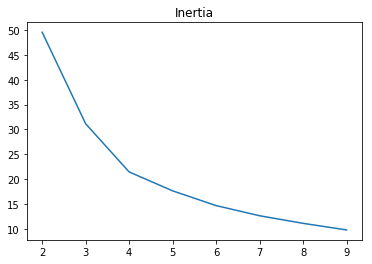

In [315]:
plt.plot(range(2, 10), inertia_arr2)

plt.title('Inertia')
plt.show()

In [316]:
from sklearn.cluster import AgglomerativeClustering

In [317]:
model2=AgglomerativeClustering(n_clusters=6)
train['cluster_square']=model2.fit_predict(train_DisSq)

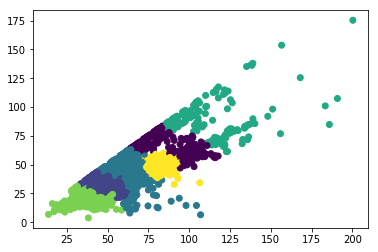

In [318]:
plt.scatter(train['Square'],train['LifeSquare'],c=train['cluster_square'])

In [319]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(train_DisSq, train['cluster_square'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [320]:
valid_DisSq = scaler.fit_transform(valid.loc[:,['Square','Rooms']])


In [321]:
valid['cluster_square']=knn.predict(valid_DisSq)

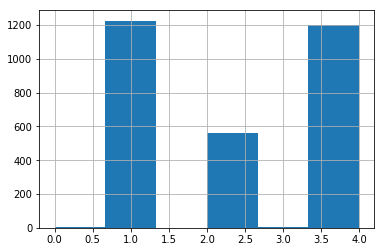

In [322]:
valid['cluster_square'].hist(bins=6)


In [323]:
price=train['Price'].mean()
price

214449.1673897029

In [326]:
price_mean_rooms=train.groupby(['Rooms'],as_index=False).agg({'Price':'mean'}).rename(columns={'Price':'price_mean_rooms'})
price_mean_sq

,cluster_square,price_mean_sq
0,0,310161.409205
1,1,192451.755005
2,2,228160.180317
3,3,347423.668363
4,4,162371.729752
5,5,304691.864774


In [325]:
price_mean_sq_rooms=train.groupby(['cluster_square','Rooms'],as_index=False).agg({'Price':'mean'}).rename(columns={'Price':'price_mean_sq_rooms'})
price_mean_sq_rooms

,cluster_square,Rooms,price_mean_sq_rooms
0,0,1.0,257685.907163
1,0,2.0,253967.752296
2,0,3.0,312895.000546
3,0,4.0,421365.493749
4,0,5.0,384604.543249
5,1,1.0,150873.403672
6,1,2.0,210118.846568
7,1,3.0,211711.982106
8,1,5.0,159421.243743
9,2,1.0,178985.761488


In [327]:
def add_mean_price(df,price_mean_sq_rooms,price_mean_rooms,price):
    df=pd.merge(df,price_mean_sq_rooms,on=['cluster_square','Rooms'],how='left')
    df=pd.merge(df,price_mean_rooms,on='Rooms',how='left')
    df['price_mean_sq_rooms']=df['price_mean_sq_rooms'].fillna(df['price_mean_rooms'])
    df['price_mean_sq_rooms']=df['price_mean_sq_rooms'].fillna(price)
    df['price_mean_rooms']=df['price_mean_rooms'].fillna(price)
    return df

In [328]:
train=add_mean_price(train,price_mean_sq_rooms,price_mean_rooms,price)

In [329]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 22 columns):
Id                     7000 non-null int64
DistrictId             7000 non-null int64
Rooms                  7000 non-null float64
Square                 7000 non-null float64
LifeSquare             7000 non-null float64
KitchenSquare          7000 non-null float64
Floor                  7000 non-null int64
HouseFloor             7000 non-null float64
HouseYear              7000 non-null int64
Ecology_1              7000 non-null float64
Ecology_2              7000 non-null object
Ecology_3              7000 non-null object
Social_1               7000 non-null int64
Social_2               7000 non-null int64
Social_3               7000 non-null int64
Helthcare_2            7000 non-null int64
Shops_1                7000 non-null int64
Shops_2                7000 non-null object
Price                  7000 non-null float64
cluster_square         7000 non-null int64
price_mean_sq_ro

In [330]:
feats=['DistrictId', 'HouseYear', 'cluster_square', 'price_mean_sq_rooms','price_mean_rooms','Rooms','Square']

In [331]:
from sklearn.ensemble import RandomForestRegressor as RF

In [332]:
from sklearn.model_selection import GridSearchCV

In [333]:
params={'min_samples_leaf':[3,5,7,10],
        'n_estimators':[25,50,75,100],
        'max_depth':[3,5,7]
       }
regr=GridSearchCV(RF(),param_grid=params,cv=2)

In [334]:
%%time
regr.fit(train.loc[:,feats],train['Price'])

Wall time: 32.2 s


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': [3, 5, 7, 10], 'n_estimators': [25, 50, 75, 100], 'max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [335]:
regr.best_params_

{'max_depth': 7, 'min_samples_leaf': 5, 'n_estimators': 100}

In [336]:
regr.best_score_


0.6061520320491299

In [337]:
RFR=RF(max_depth= 7, min_samples_leaf=5, n_estimators=100,random_state=42)

In [338]:
%%time
RFR.fit(train.loc[:,feats],train['Price'])

Wall time: 1.05 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [339]:
for i,j in zip(feats,RFR.feature_importances_):
    print(i,j)

DistrictId 0.2699720000690021
HouseYear 0.06569908491825395
cluster_square 0.0030475754931670916
price_mean_sq_rooms 0.19967428013592722
price_mean_rooms 0.015440343817064375
Rooms 0.010360538704096176
Square 0.4358061768624891


In [340]:
valid=add_mean_price(valid,price_mean_sq_rooms,price_mean_rooms,price)

In [341]:
y_pred=RFR.predict(valid.loc[:,feats])

In [342]:
from sklearn.metrics import r2_score as r2

In [343]:
r2(valid['Price'],y_pred)

0.6059118540175907

In [344]:
r2(train['Price'],RFR.predict(train.loc[:,feats]))

0.6906313381980335

In [346]:
test_scaled=scaler.transform(data_test.loc[:,['Square','Rooms']])
data_test['cluster_square']=knn.predict(test_scaled)

In [349]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 22 columns):
Id                     5000 non-null int64
DistrictId             5000 non-null int64
Rooms                  5000 non-null float64
Square                 5000 non-null float64
LifeSquare             3959 non-null float64
KitchenSquare          5000 non-null float64
Floor                  5000 non-null int64
HouseFloor             5000 non-null float64
HouseYear              5000 non-null int64
Ecology_1              5000 non-null float64
Ecology_2              5000 non-null object
Ecology_3              5000 non-null object
Social_1               5000 non-null int64
Social_2               5000 non-null int64
Social_3               5000 non-null int64
Healthcare_1           2623 non-null float64
Helthcare_2            5000 non-null int64
Shops_1                5000 non-null int64
Shops_2                5000 non-null object
cluster_square         5000 non-null int64
price_mean_sq_ro

In [348]:
data_test=add_mean_price(data_test,price_mean_sq_rooms,price_mean_rooms,price)

In [350]:
data_test['Price']=RFR.predict(data_test.loc[:,feats])

In [351]:
data_test.head(20)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,cluster_square,price_mean_sq_rooms,price_mean_rooms,Price
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,2748,1,NaN,0,0,B,1,210118.846568,215282.695556,204925.842397
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,...,1437,3,NaN,0,2,B,1,210118.846568,215282.695556,244452.907786
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,...,7538,87,4702.0,5,5,B,4,160013.854847,160090.393311,185263.961205
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,4583,3,NaN,3,3,B,1,210118.846568,215282.695556,335571.504503
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,...,629,1,NaN,0,0,A,4,160013.854847,160090.393311,128043.539077
5,7633,53,1.0,40.675627,NaN,1.0,21,21.0,1977,0.049637,...,7759,0,229.0,1,3,B,4,160013.854847,160090.393311,159264.268655
6,13329,23,2.0,68.099538,64.843025,1.0,2,17.0,1977,0.075779,...,1437,3,NaN,0,2,B,1,210118.846568,215282.695556,165379.294105
7,5502,32,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,...,7960,6,350.0,3,11,B,1,210118.846568,215282.695556,203211.620882
8,4220,96,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,...,14892,4,NaN,1,4,B,2,259271.986330,290778.216555,322663.056090
9,11538,6,3.0,80.219400,47.660260,9.0,13,17.0,2014,0.243205,...,1564,0,540.0,0,0,B,2,259271.986330,290778.216555,223619.540480


In [352]:
data_test[['Id','Price']].to_csv('YMelnikova_predictions.csv',index=None)